In [9]:
import pandas as pd
def get_df():
    df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
    df = df.drop(df.index[:13])
    df = df.drop(df.index[-1:])
    df['datetime'] = pd.date_range(start='2016-03-01', periods=85, freq='MS')
    return df

detrendování dat

In [15]:
df = get_df()
df_detrend = df.copy()
parametry = ['aktivni-1', 'nove-1', ]
for parametr in parametry:
    df_detrend[parametr] = pd.Series((df[parametr]))

deseasonalizování dat

In [16]:
import statsmodels.api as sm
df_deseasoned = df_detrend.copy()
for parametr in parametry:
    decomp = sm.tsa.seasonal_decompose(df_detrend[parametr], period=12, model='additive')
    df_deseasoned[parametr] = df_detrend[parametr] - decomp.seasonal.values



grafy

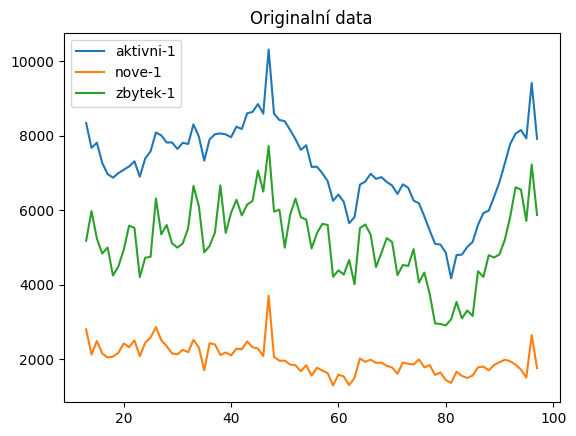

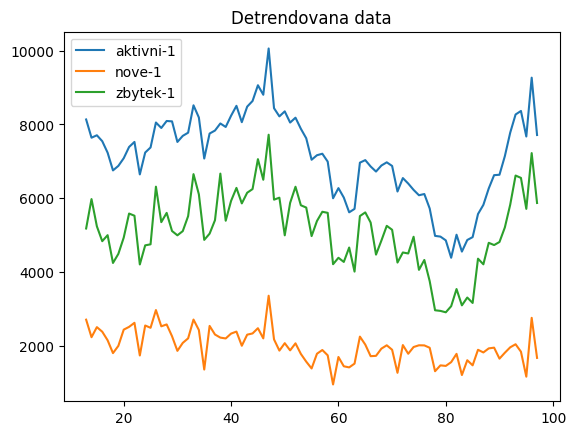

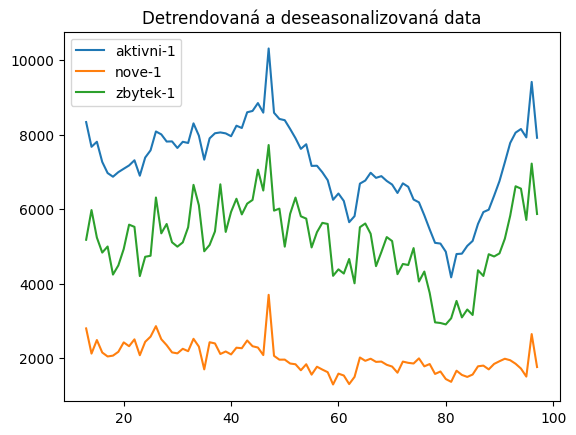

In [36]:
from matplotlib import pyplot as plt
#>> originalni data
plt.plot(df.index, df['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df['nove-1'], label='nove-1')
plt.plot(df.index, df['zbytek-1'], label='zbytek-1')
plt.legend()
plt.title('Originalní data')
plt.show()
#>> detrendovana data
plt.plot(df.index, df_detrend['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df_detrend['nove-1'], label='nove-1')
plt.plot(df.index, df_detrend['zbytek-1'], label='zbytek-1')
plt.legend()
plt.title('Detrendovana data')
plt.show()
#>> detrendovana a deseasonalizovana data
plt.plot(df.index, df_deseasoned['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df_deseasoned['nove-1'], label='nove-1')
plt.plot(df.index, df_deseasoned['zbytek-1'], label='zbytek-1')
plt.legend()
plt.title('Detrendovaná a deseasonalizovaná data')
plt.show()

OLS model

In [34]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report, r2_score

import statsmodels.api as sm

#*defiunovani dat
#@parametry
parametry = ['aktivni-1', 'nove-1', 'zbytek-1']
X = df_deseasoned[parametry]
y = df_deseasoned['aktivni']

#* training dataframe bez randomizace
X_train = X.drop(X.index[-12:])
y_train = y.drop(y.index[-12:])
#* testing dataframe bez randomizace
X_test = X.drop(X.index[:-12])
y_test = y.drop(y.index[:-12])

#* fitnuti ols modelu na train datech
osl = sm.OLS(y_train, X_train).fit()

#*predikce na train datech
y_pred_train = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2_train = r2_score(y_train, y_pred_train)

#*preikce na test setu
y_pred = model.predict(X_test)
y_pred_list.append(y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_test = r2_score(y_test, y_pred)

#>> output
print(len(models))
print(f"Mean absolute error: {mae:.2f}")
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"r2 train setu: {r2_train:.2f}")
print(f"r2 test setu: {r2_test:.2f}")
print(model.summary())

0
Mean absolute error: 591.10
Mean squared error: 486495.83
Root mean squared error: 697.49
r2 train setu: 0.86
r2 test setu: 0.45
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              6048.
Date:                Tue, 02 May 2023   Prob (F-statistic):                    4.35e-96
Time:                        20:49:19   Log-Likelihood:                         -646.33
No. Observations:                  85   AIC:                                      1299.
Df Residuals:                      82   BIC:                                      1306.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                        